$$
\newcommand{\fudm}[2]{\frac{\mathrm{D} #1}{\mathrm{D} #2}}
\newcommand{\pad}[2]{\frac{\partial #1}{\partial #2}}
\newcommand{\ppad}[2]{\frac{\partial^2 #1}{\partial #2^2}}
\newcommand{\ppadd}[3]{\frac{\partial^2 #1}{\partial #2 \partial #3}}
\newcommand{\nnabla}{\nabla^2}
\newcommand{\eps}{\epsilon}
\newcommand{\vdetail}[1]{\vb{#1}=\begin{pmatrix}#1_1\\#1_2\\#1_3\end{pmatrix}}
\newcommand{\vb}[1]{\mathbf{#1}}
\newcommand{\va}[1]{\vec{#1}}
\newcommand{\tb}[1]{\underline{\underline{\mathbf{#1}}}}
\newcommand{\fud}[2]{\frac{\mathrm{d} #1}{\mathrm{d} #2}}
$$

# Streamlines, Pathlines, Streaklines

In this lecture we discuss three ways to describe and experimentally visualize a flow field, namely the streamline, the pathline, and the streakline. A point in lab space (not moving with the fluid) is called $\vb{x}$, the velocity field is a function of space and time, i.e. $\vb{u}=\vb{u}(\vb{x},t)$.

Suppose we inject dye at a point in the flow over a period of time. At any given time (after we start the dye injection), we will see the locus of points in space that are the positions of particles that were at the injection position at previous times. In unsteady flow (flow that is a function of time) these dye streaks are called *streaklines*.
In contrast if we mark a single fluid particle, for example we color it and then follow the path of this particle over time we obtain the *pathline* of this fluid particle.
The *streamline* is the shape a thin filament would form at some instant of time in the flow, e.g. a wool thread pictured with strobe photography. This filament aligns with flow (we will learn later why) such that it is tangential to the instantenous velocity field. In steady flow, all three kind of lines coincide, while for unsteady flow they are distinct. In this lecture we derive the ordinary differential equations for the three lines and solve them exemplarily using the appropriate initial conditions. Also you will find a simple python script plotting the lines.

Above discussion neglects the effect of diffusion or non-neutral buoyancy which would cause particles not to follow the fluid particles. Also, we ignore any inertia of the particle.


## Streamline:

The streamline is a curve tangential to the instantaneous velocity vector; the trajectory of a particle on this “frozen” velocity field. Let $d\vb{x}$ be the tangent vector to the streamline of a velocity field $\vb{u}(\vb{x};t)$ the velocity field.

$$d\vb{x} \times \vb{u} = \vb{0}$$

This equation can be transformed into three separate equations (*Show!*):

$$\frac{dx_1}{u_1}=\frac{dx_2}{u_2}=\frac{dx_3}{u_3}\quad .$$

For each of the terms the quotient is the same and has the unit of time; let's name this $d\tau$. Above we mentioned a streamline is only valid for a fixed time (if the flow field is unsteady), let's call this time $t=t_0$. We can thus rewrite above equation:

$$\frac{dx_1}{u_1(\vb{x};t=t_0)}=
\frac{dx_2}{u_2(\vb{x};t=t_0)}=
\frac{dx_3}{u_3(\vb{x};t=t_0)}=d\tau$$

Which can be written as three separate equations

\begin{eqnarray}
\frac{dx_1}{d\tau}&=&u_1(\vb{x};t=t_0)\\
\frac{dx_2}{d\tau}&=&u_2(\vb{x};t=t_0)\\
\frac{dx_3}{d\tau}&=&u_3(\vb{x};t=t_0)
\end{eqnarray}

with 
$$\vb{x}(\tau=0)=
\left(\begin{array}{c}
x_{10}\\
x_{20}\\
x_{30}
\end{array}\right)$$

Then we integrate above equation and if possible  eliminate $\tau$ by describing it as a function of one of the coordinates $(x_1, x_2, x_3)$. If not, the streamlines remains being parameterized by $\tau$.

### Example

Find the streamline which goes through $\vb{x}=\left(\begin{array}{c}1\\1\end{array}\right)$ at time $t=1$ of the velocity field $\vb{u}=\left(\begin{array}{c}2x_1 + t\\x_2 - 2t\end{array}\right)$. Please ignore the inconsitency in the units.

First we solve for $x_1$:

$\frac{dx_1}{d\tau}=2x_1+\left.t\,\right|_{t=1}$ with $x_1(\tau=0)=1$
integrate and insert initial condition leads to 
$x_1 = \frac{3}{2} e^{2\tau} - \frac{1}{2}$.

And then we solve for $x_2$:

$\frac{dx_2}{d\tau}=x_2+\left.2\,t\,\right|_{t=1}$ with $x_2(\tau=0)=1$ and again integrate and insert initial conditions gives $x_2=-e^{\tau}+2$. 

Above equations are simple enought to eliminate the parameter $\tau$ by solving for $\tau$ in the first equation and inserting it into the second, i.e. thus we obtain: 

$$x_2=2-\sqrt{\frac{2}{3}\left(x_1+\frac{1}{2}\right)}$$.











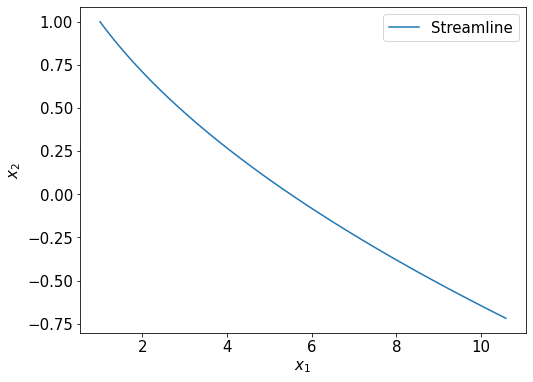

In [13]:
#standard boilerplate for Python
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt
plt.rc('font', size=15)
plt.rc('figure', figsize=(8,6))

tau=np.linspace(0,1.,100)
X1_stream=3./2.*np.exp(2.*tau)-.5
X2_stream=-np.exp(tau)+2.
plt.plot(X1_stream,X2_stream,label='Streamline')
plt.legend()
plt.xlabel('$x_1$')
plt.ylabel('$x_2$');

We can add a vector field to this plot using the function `quiver()`. This function needs the velocity field which is calculated using two arrays, one for the $x_1$-coordinate and one for the $x_2$-coordinate through the function `mgrid()`.  

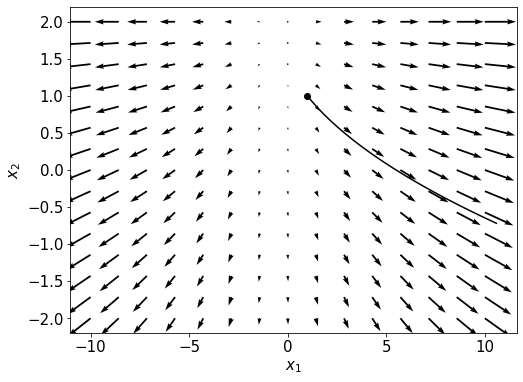

In [14]:
#generate two arrays with 15x15 elements
#containing the x1 and x2 coordinates respectively
x1,x2 = np.mgrid[-10.:10.:15j, -2.:2.:15j]
#Calculate the velocity field for each element of the
#arrays x1 and x2
u1=2.*x1+1.
u2=x2-2.
plt.quiver(x1,x2,u1,u2,angles='xy') #plot the velocity field
#streamline through (1,1) at time t=1
plt.plot(X1_stream,X2_stream,'k',linewidth=1.5)
plt.plot(1.,1.,'ko')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$');

You can see that the streamline is following nicely the velocity vectors, i.e. the streamline is tangential to the velocity vector.
<p>
<div class="Detail"> **Homework:** <p>
Now you add a plot of the streamlines using the python function `streamplot()` and color the lines as a function of the velocity magnitude. </div>

You may wonder how the function `streamplot()` calculates the streamlines. It does so by integrating ODEs numerically.  

## Pathlines
The pathline is the trajectory of a specific fluid particle. We specify the fluid particle by choosing its position $\vb{x}_0$ at a specific time $t_0$.
$$\fud{\vb{x}}{t}=\vb{u}(\vb{x};t)$$ with $\vb{x}(t=t_0)=\vb{x}_0$.
For most of the cases no analytical solution exists and the a numerical integration is done. The solution is given as a vector function $\vb{x}=\vb{x}(\vb{x}_0;t)$.


### Example
For above example of the flow field we can calculate analytically the flow field. We first specify the fluid particle $\vb{x}_0(t=1)=(1,1)^T$.

Thus we have to solve

$$\fud{\vb{x}}{t}=
\left(
\begin{array}{c}
2 x_1  + t\\
x_2 - 2t
\end{array}\right)$$

Both equations are linear ODEs which can be solved with the [integrating factor](http://en.wikipedia.org/wiki/Integrating_factor) and give

$$\vb{x}=\left(
\begin{array}{c}
\frac{7}{4} e^{2(t-1)}-\frac{t}{2}-\frac{1}{4}\\
-3e^{t-1}+2t+2
\end{array}
\right)\quad .$$
Here we can't eliminate the parameter $t$, yet for simpler solutions that may be possible and explixite results of the kind $x_2=f(x_1)$ may be obtained.

Next we plot the pathline (blue) and compare it with the streamline (green).

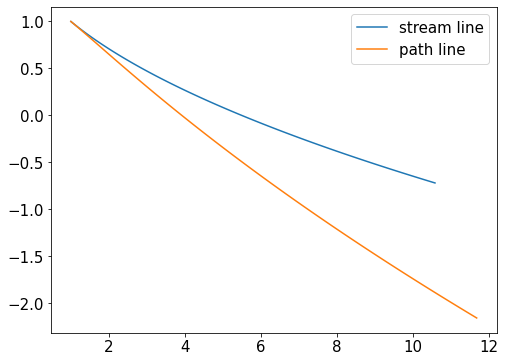

In [16]:
t=np.linspace(1,2,100)
X1_path=7./4.*np.exp(2.*(t-1))-t/2.-0.25
X2_path=-3.*np.exp(t-1.)+2.*t+2.
#one can add multiple lines with a single plot command
plt.plot(X1_stream,X2_stream,X1_path,X2_path)
#and then add legends to the plot.
plt.legend(('stream line','path line'));

## Streaklines
Streaklines are the locus of points at time $t_0$ which have passed through a particular point $\vb{x}_0$ at some past time $\hat{t}\le t_0$.

The streamlines can be obtained by calculating all pathlines through a point $\vb{x}_0$ at some time $t$, i.e.

$$\fud{\vb{x}}{t}=\vb{u}(\vb{x};t)$$ with $\vb{x}(t=\hat{t})=\vb{x}_0$.

We therefore obtain a solution $\vb{x}(\vb{x_0};t;\hat{t})$. Next we specify the time the streakline is observed $t$ and fix $\vb{x}_0$ to obtain the positions $\vb{x}(\hat{t})$ with $\hat{t}\le t$.

### Example
Let's find the streakline at time $t=1$ through the point $x_0=(1,1)^T$. We therefore have to solve the ODEs with the initial condition $\vb{x}(t=\hat{t})=\vb{x}_0$. This means, that we allow for all pathlines passing through point $\vb{x}_0$.

$$\fud{\vb{x}}{t}=\left(\begin{array}{c}
2 x_1 + t\\
x_2 - 2t
\end{array}\right)$$

If we then select a specific time, we obtain the locus of all the pathlines for that time, parameterized by $\hat{t}$.

Let's do it, first we find the solution for $\vb{x}(t=\hat{t})=\vb{x}_0$, which can be again obtained with the integrating factor. The constant of integration now includes $t$ and $\hat{t}$ and the result is

$$\vb{x}=\left(
\begin{array}{c}
\frac{5+2\hat{t}}{4} e^{2(t-\hat{t})}-\frac{t}{2}-\frac{1}{4}\\
-(1+2\hat{t})e^{t-\hat{t}}+2t+2
\end{array}
\right)\quad .$$

To obtain the streakline at time $t=t_0=1$, we just insert this into above parametrization and obtain

$$\vb{x}=\left(
\begin{array}{c}
\frac{5+2\hat{t}}{4} e^{2(1-\hat{t})}-\frac{3}{4}\\
-(1+2\hat{t})e^{1-\hat{t}}+4
\end{array}
\right)\quad .$$
Again, the expression is too complicated to obtain an explicit solution of the kind $x_2=f(x_1)$, yet we can plot it using $\hat{t}$ as parameter, $\hat{t}<t$ which is $\hat{t}<1$.





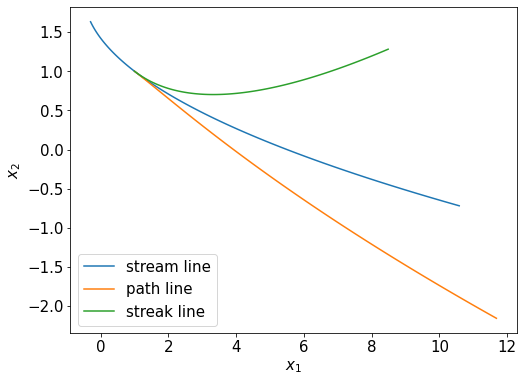

In [4]:
#t_hat goes from 0. to 1. 
#and shows the locus of all pathlines
#going through point (0.,0) at time t=1.
th=np.linspace(0.,1.,100)
X1_streak=(5.+2.*th)/4.*np.exp(2.*(1-th))-0.75
X2_streak=-(1.+2*th)*np.exp(1.-th)+4
#Let's plot all three lines together
plt.plot(X1_stream,X2_stream,X1_path,X2_path,X1_streak,X2_streak)
plt.legend(('stream line','path line','streak line'));
plt.xlabel('$x_1$')
plt.ylabel('$x_2$');

Let's have a look at above graph. All graphs go through point $(1,1)^T$. From the velocity field 
$$\vb{u}=\left(\begin{array}{c}2x_1 + t\\x_2 - 2t\end{array}\right)$$
it is evident that the vertical velocity component $u_2$ becomes more negative with time. Thus the pathline of a particle passing through point $(1,1)^T$ at $t=1$ will be more negative in $x_2$-direction than the streamline through this point and at this time.
The streakline is the locus of all pathlines who have passed through $(1,1)^T$ at time $t=1$; then the velocity field in $x_2$-direction was less negative. Therefore, the streakline is above both other lines. 
<p>
<div class="Detail"> **Homework:** <p>
Have a look at the next three videos and explain what is that what you see. Are these streamlines, streaklines, and/or pathlines?</div>

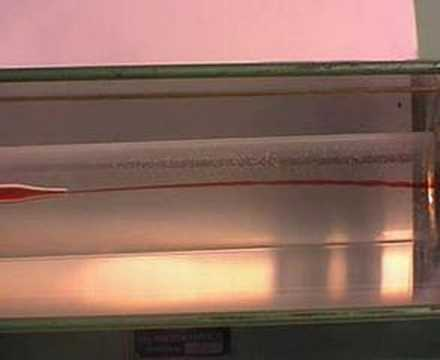

In [5]:
from IPython.display import YouTubeVideo
#VIDEO 1
YouTubeVideo('KqqtOb30jWs')

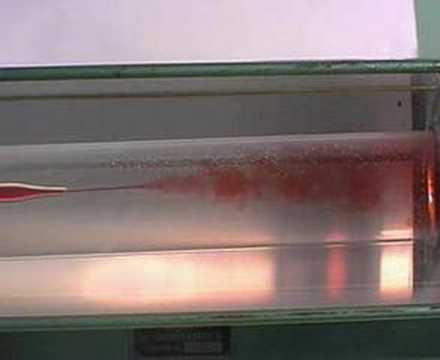

In [6]:
#VIDEO 2
YouTubeVideo('NplrDarMDF8')

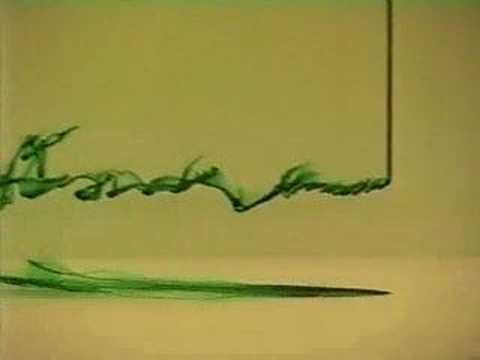

In [7]:
#VIDEO 3#VIDEO 3
YouTubeVideo('cUTkqZeiMow')

## Microfluidic Example

Two third year students (Jin Zhanhe & Huang Xin) have build a Hele-Shaw flow cell and studied the flow around a hydrofoil model.


<div class="Figure">
<img src="pics/5 wing not straight 2.gif">
Figure 1: Probing streamlines of an airfoil in a Hele-Shaw flow.
</div>



Adding the individual streamlines ontop of each we obtain the following picture:

<div class="Figure">
<img src="pics/hele_shaw_wing_superimposed.png">
Figure 2: Superimposed streamlines from Fig. 1.
</div>
